In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


Importing and Organizing the data

Note:

In model development all the steps carried out in EDA for data cleaning will be same, however we will take 1,2,3,5 year data for training and 4th year data for testing.

In [2]:
dataset_1 = arff.loadarff('/content/drive/MyDrive/1year.arff')
dataset_2 = arff.loadarff('/content/drive/MyDrive/2year.arff')
dataset_3 = arff.loadarff('/content/drive/MyDrive/3year.arff')
dataset_4 = arff.loadarff('/content/drive/MyDrive/4year.arff')
dataset_5 = arff.loadarff('/content/drive/MyDrive/5year.arff')

In [3]:
#Training dataset
df1 = pd.DataFrame(dataset_1[0])
df2 = pd.DataFrame(dataset_2[0])
df3 = pd.DataFrame(dataset_3[0])
df5 = pd.DataFrame(dataset_5[0])

#Testing dataset
df4 = pd.DataFrame(dataset_4[0])

In [4]:
df_train = pd.concat([df1,df2,df3,df5],axis = 0)

df_test = df4

In [5]:
print("{0} Rows and {1} columns for Training dataset".format(df_train.shape[0],df_train.shape[1]))
print("{0} Rows and {1} columns for Test dataset".format(df_test.shape[0],df_test.shape[1]))

33613 Rows and 65 columns for Training dataset
9792 Rows and 65 columns for Test dataset


In [6]:
#Top five records in the Train data
df_train.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [7]:
#Checking the Datatype of the features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33613 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   33606 non-null  float64
 1   Attr2   33606 non-null  float64
 2   Attr3   33606 non-null  float64
 3   Attr4   33522 non-null  float64
 4   Attr5   33545 non-null  float64
 5   Attr6   33606 non-null  float64
 6   Attr7   33606 non-null  float64
 7   Attr8   33538 non-null  float64
 8   Attr9   33604 non-null  float64
 9   Attr10  33606 non-null  float64
 10  Attr11  33570 non-null  float64
 11  Attr12  33522 non-null  float64
 12  Attr13  33507 non-null  float64
 13  Attr14  33606 non-null  float64
 14  Attr15  33585 non-null  float64
 15  Attr16  33537 non-null  float64
 16  Attr17  33538 non-null  float64
 17  Attr18  33606 non-null  float64
 18  Attr19  33506 non-null  float64
 19  Attr20  33507 non-null  float64
 20  Attr21  27917 non-null  float64
 21  Attr22  33606 non-null  float64
 22 

Note:

We can see that the CLASS feature is of Object-Type which means it is probably in String format. We will first check the unique values in that series then replace them with either 0 or 1

In [8]:
#Listing the names of all features
data_keys=list(df_train.columns)
len(data_keys)

65

In [9]:
#Checking the unique values in the Class-Feature
df_train['class'].unique()

array([b'0', b'1'], dtype=object)

In [10]:
df_train['class'].value_counts()

b'0'    32037
b'1'     1576
Name: class, dtype: int64

In [11]:
#Imputing class labels of train and test into Int type
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df_train['class']= label_encoder.fit_transform(df_train['class'])
df_test['class']= label_encoder.fit_transform(df_test['class'])
df_train['class'].unique()

array([0, 1])

In [12]:
df_train['class'].dtype #The datatype for the CLASS-Feature is now converted into INT type.

dtype('int64')

In [13]:

df_train['class'].value_counts()

0    32037
1     1576
Name: class, dtype: int64

<Axes: title={'center': 'Distribution of Class Labels in Training Data'}>

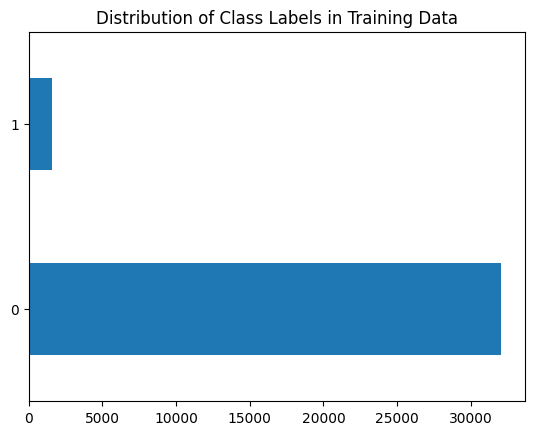

In [14]:
plt.title('Distribution of Class Labels in Training Data')
df_train['class'].value_counts().plot(kind = 'barh')

<Axes: title={'center': 'Distribution of Class Labels in Test Data'}>

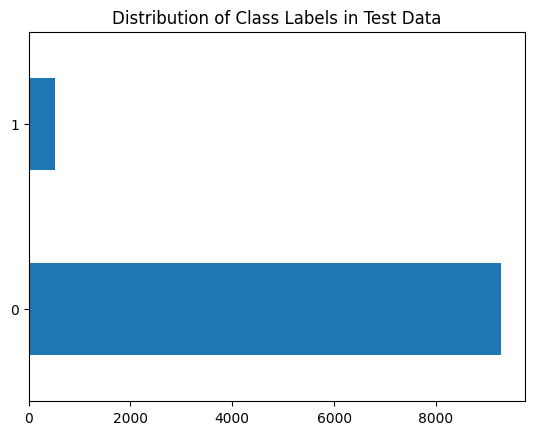

In [15]:
plt.title('Distribution of Class Labels in Test Data')
df_test['class'].value_counts().plot(kind = 'barh')

Missing Data Analysis

In [16]:
total_cells= np.product(df_train.shape)
total_missing=df_train.isnull().sum().sum()
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing,'percent')

1.489625122148253 percent


Text(0.5, 1.0, 'Missing values in Training Dataset')

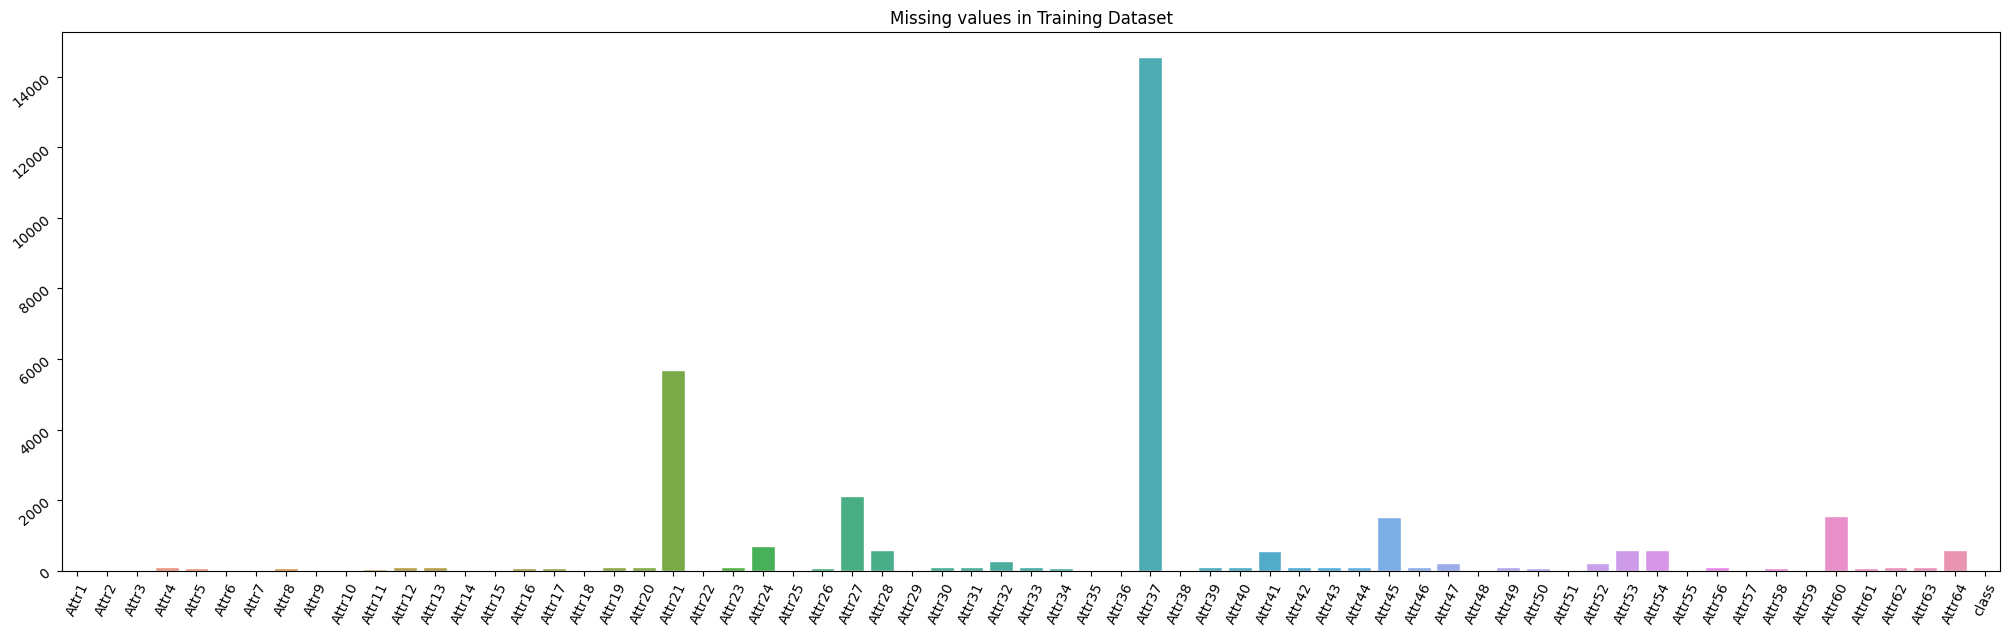

In [17]:
plt.figure(figsize = (25,7))
plt.xticks(rotation=65)
plt.yticks(rotation=40)
sns.set_theme(style = "ticks", palette = "pastel")
sns.barplot(x = df_train.columns,y = df_train.isna().sum().values)
plt.title("Missing values in Training Dataset")

In [18]:
total_cells= np.product(df_test.shape)
total_missing=df_test.isnull().sum().sum()
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

1.3788335847159376


Text(0.5, 1.0, 'Missing values in Test Dataset')

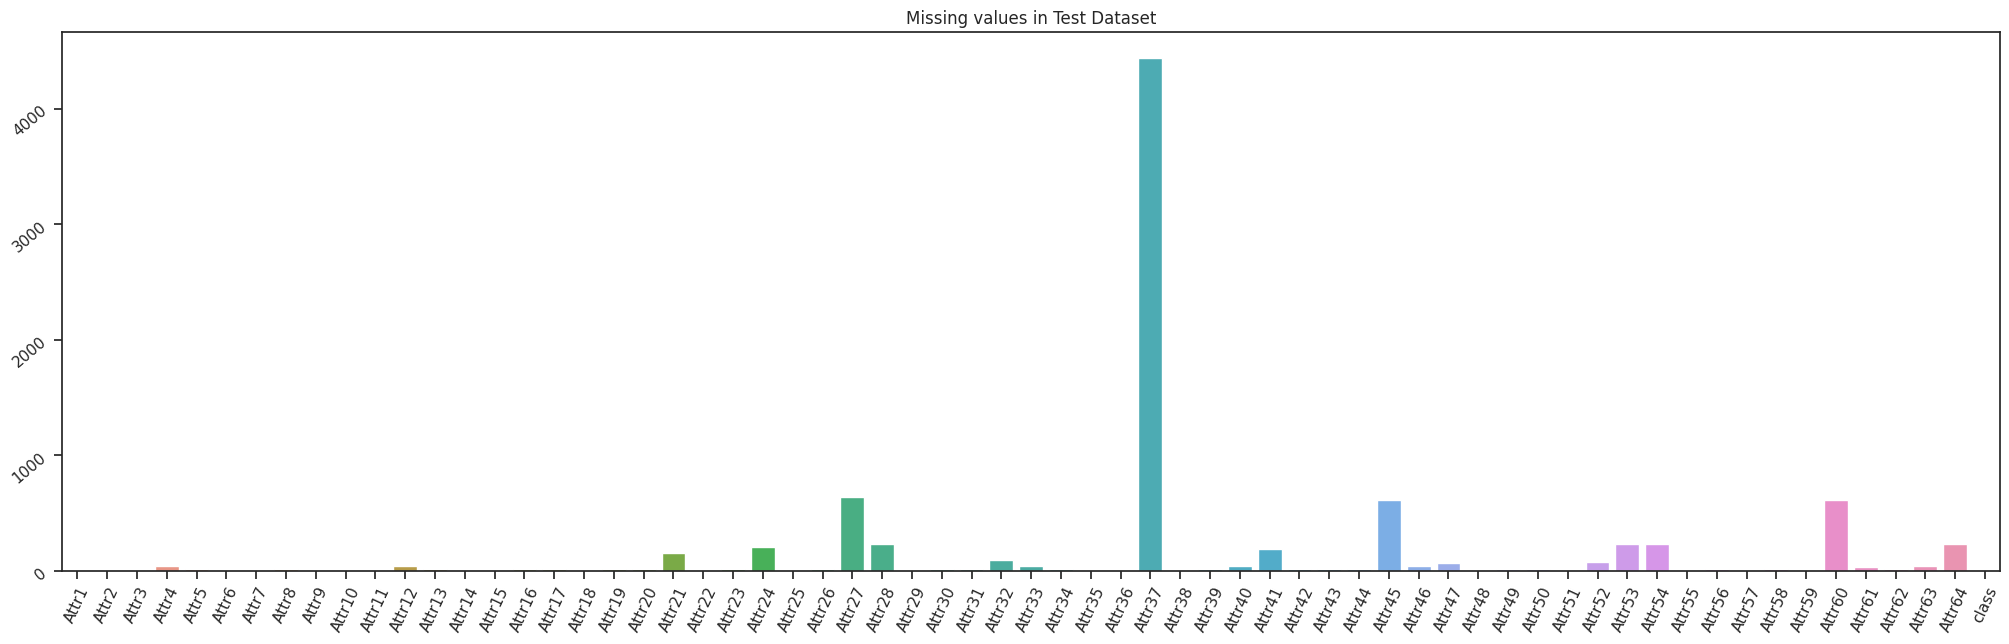

In [19]:
plt.figure(figsize = (25,7))
plt.xticks(rotation=65)
plt.yticks(rotation=40)
sns.set_theme(style = "ticks", palette = "pastel")
sns.barplot(x = df_test.columns,y = df_test.isna().sum().values)
plt.title("Missing values in Test Dataset")

<Figure size 5000x6000 with 0 Axes>

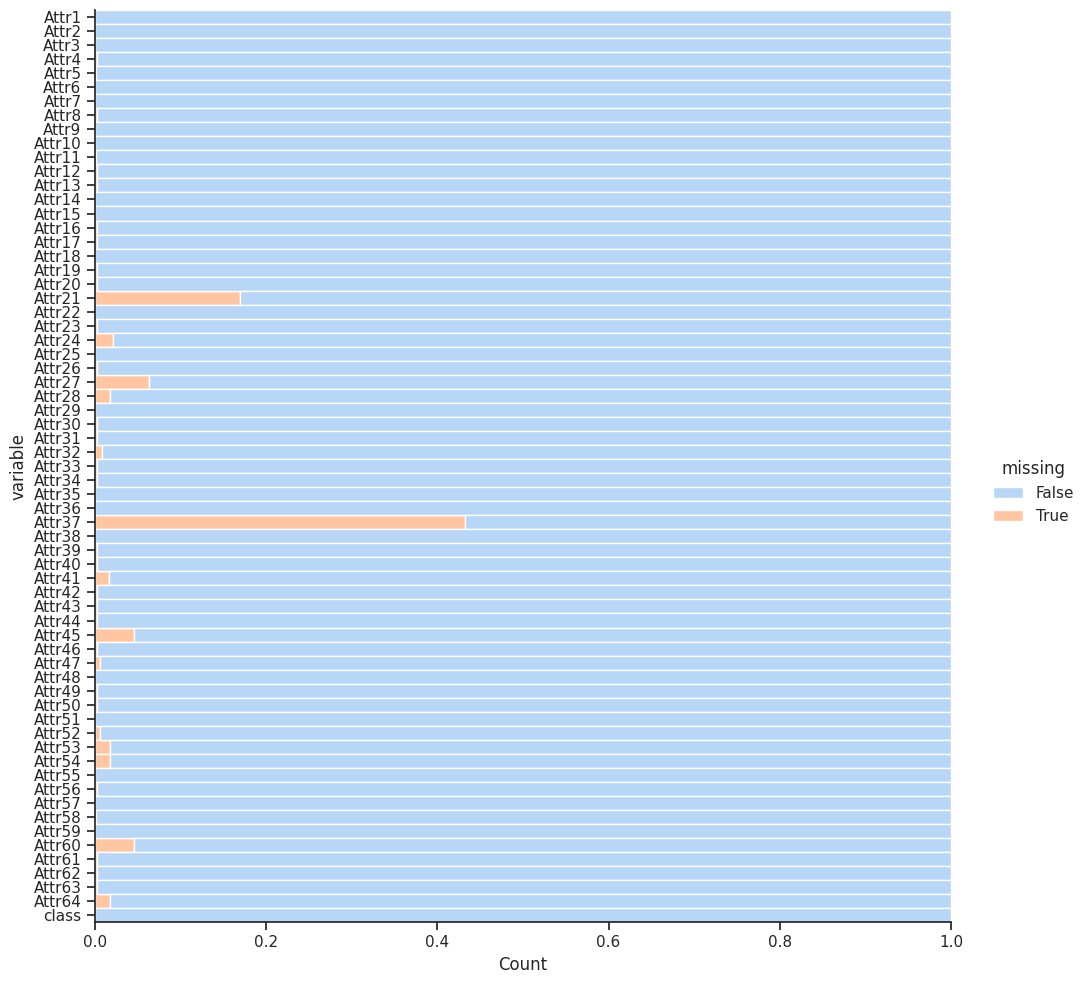

In [20]:
plt.figure(figsize=(50,60))
pltmv=sns.displot(data=df_train.isna().melt(value_name="missing"),
            y="variable",hue="missing",
            multiple="fill",height=10,aspect=1)
plt.savefig("visualizing_missing_data_with_barplot.png", dpi=100)

Text(0.5, 1.0, 'Missing values in Test Dataset')

<Figure size 5000x6000 with 0 Axes>

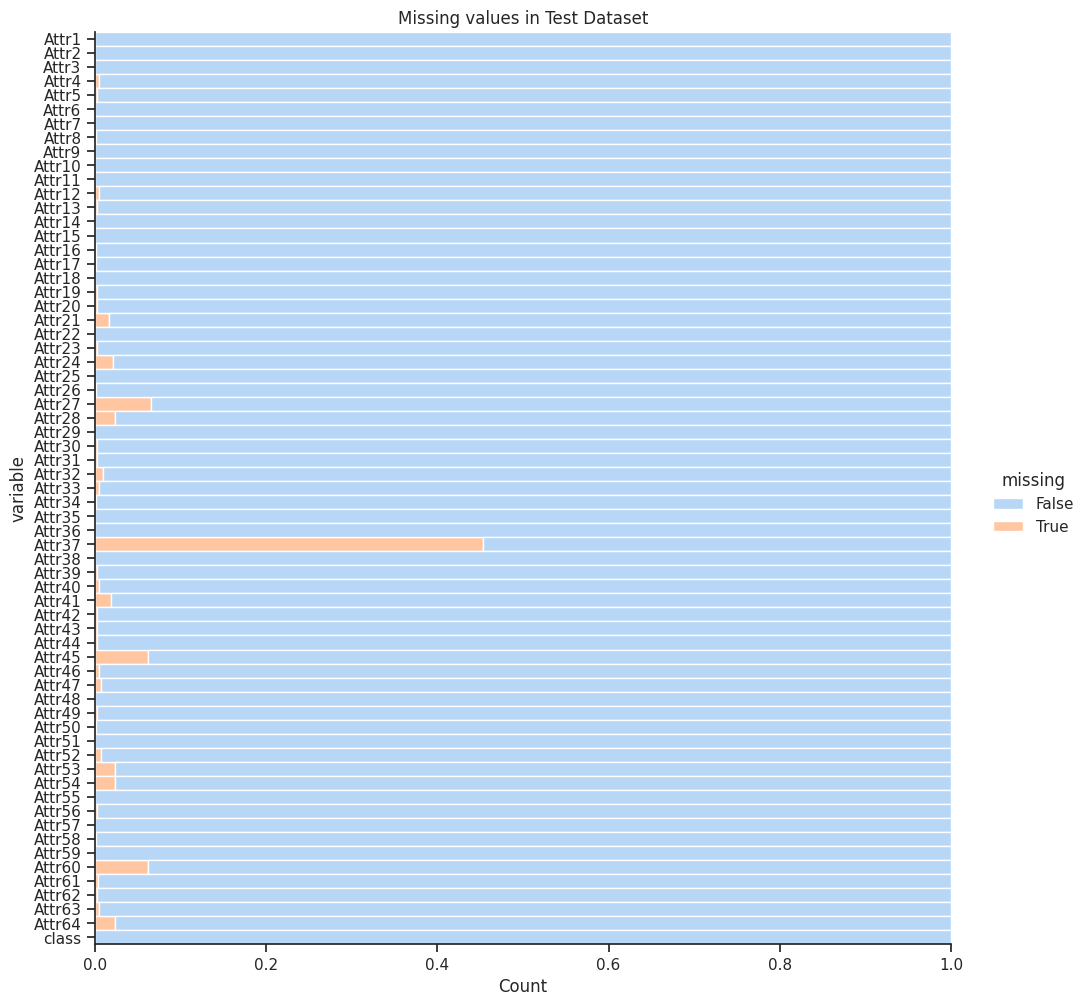

In [21]:
plt.figure(figsize=(50,60))
pltmv=sns.displot(data=df_test.isna().melt(value_name="missing"),
            y="variable",hue="missing",
            multiple="fill",height=10,aspect=1)
plt.savefig("visualizing_missing_data_with_barplot.png", dpi=100)
plt.title("Missing values in Test Dataset")

Note:

As we can see there are plethora of missing values in our dataset. We can use bfill, ffill, mean, mode or median for filling the missing values using fillna() method.

Text(0.5, 1.0, 'Missing data distribution')

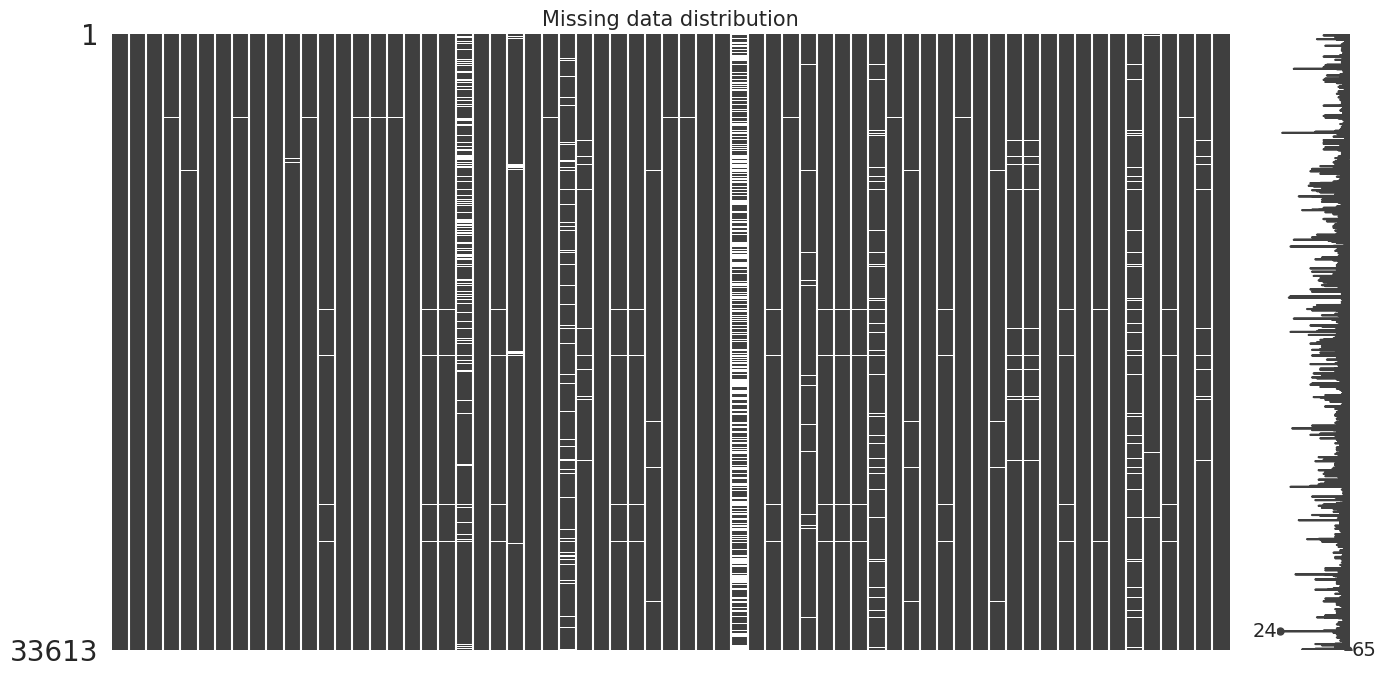

In [22]:
msno.matrix(df_train, figsize=(16,8))
plt.title("Missing data distribution", size=15)

<Axes: >

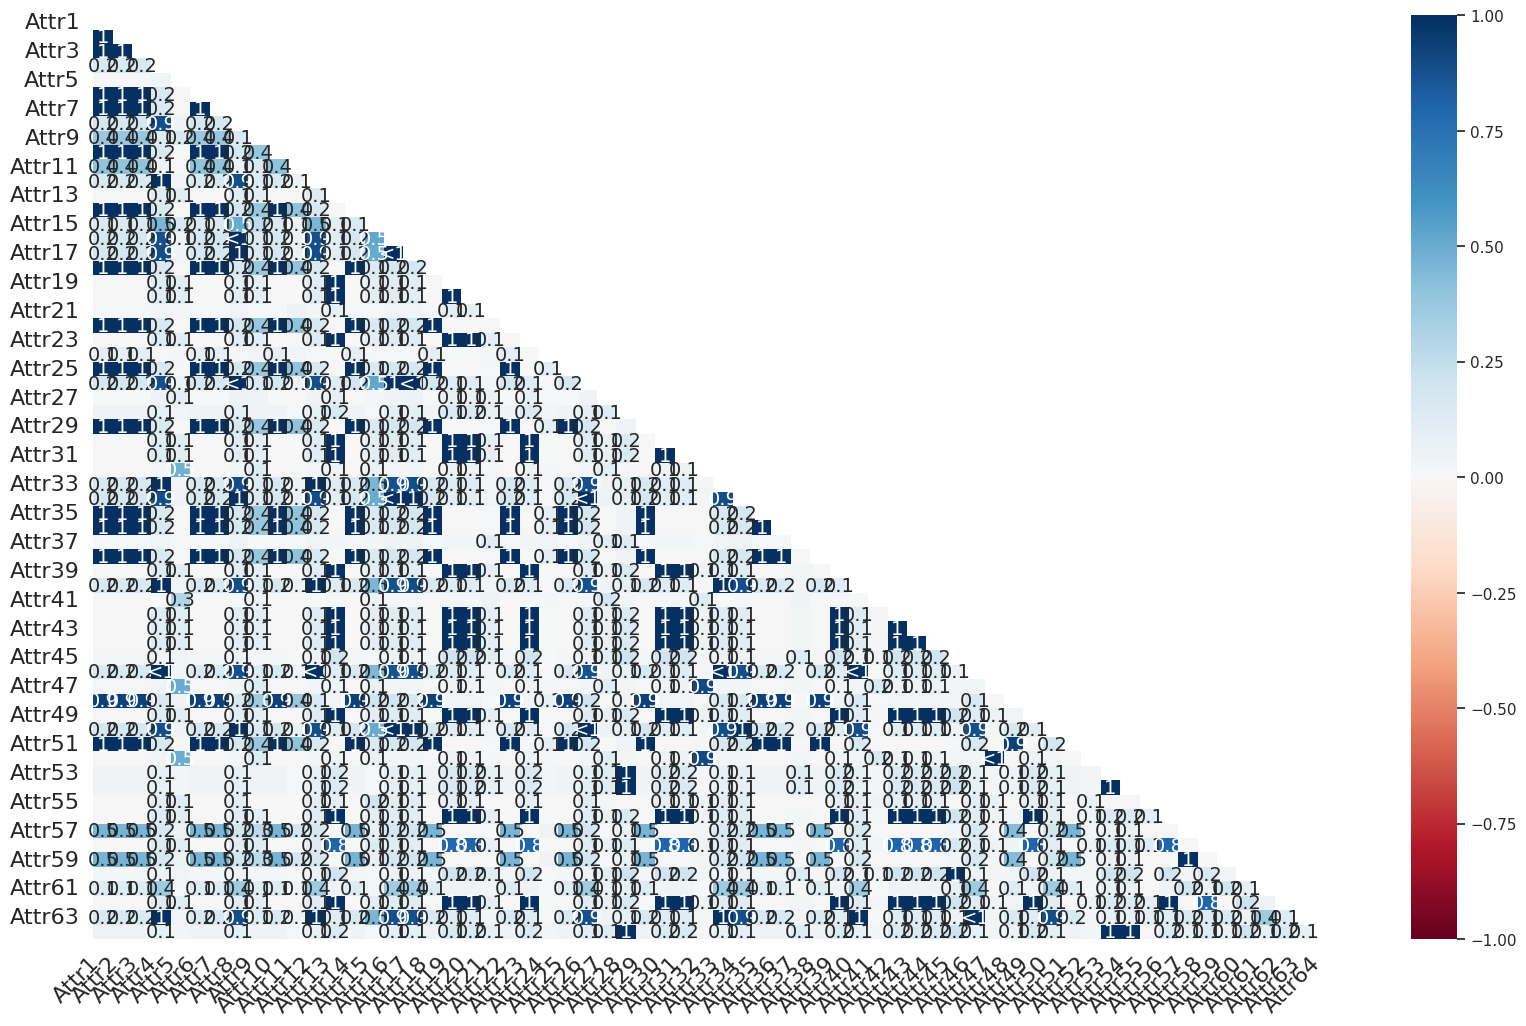

In [23]:
msno.heatmap(df_train)

Data Imputation

In [24]:
def meanImputeTrain(feature):
    avg = df_train[feature].mean()
    return avg

def meanImputeTest(feature):
    avg = df_test[feature].mean()
    return avg

In [25]:
for feature in df_train.columns:
    impute_avg = meanImputeTrain(feature)
    df_train[feature].fillna(impute_avg,inplace = True)

In [26]:
for feature in df_test.columns:
    impute_avg = meanImputeTest(feature)
    df_test[feature].fillna(impute_avg,inplace = True)

In [27]:
print('Missing values in train data',df_train.isna().any().sum()) ##There are no Missing values
print('Missing values in test data',df_test.isna().any().sum())

Missing values in train data 0
Missing values in test data 0


Note:

As you can see we dealt with missing values and there are no missing values in our dataset now. We will move forward and check whether our dataset is balanced or not.

Dealing with Imabalance Data

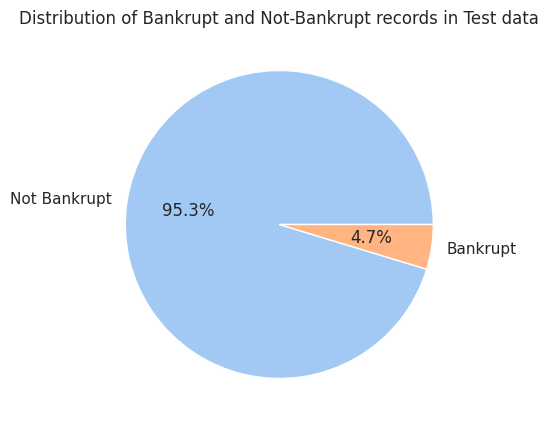

In [28]:
plt.figure(figsize = (7,5))
labels = ["Not Bankrupt", "Bankrupt"]
plt.pie(df_train['class'].value_counts().values,labels = labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in Test data")
plt.show()

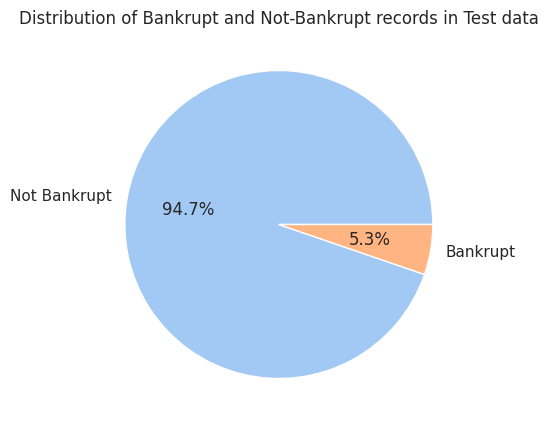

In [29]:
plt.figure(figsize = (7,5))
labels = ["Not Bankrupt", "Bankrupt"]
plt.pie(df_test['class'].value_counts().values,labels = labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in Test data")
plt.show()

Note:

It can be clearly seen from the pie chart that the dataset is imbalanced. So we will now apply SMOTE for oversampling of data values.

In [30]:
X_train = df_train.drop(columns = 'class')
y_train = df_train[['class']]

X_test = df_test.drop(columns = 'class')
y_test = df_test[['class']]

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
oversample = SMOTE()

In [33]:
X_train, y_train = oversample.fit_resample(X_train,y_train)
X_test, y_test = oversample.fit_resample(X_test,y_test)

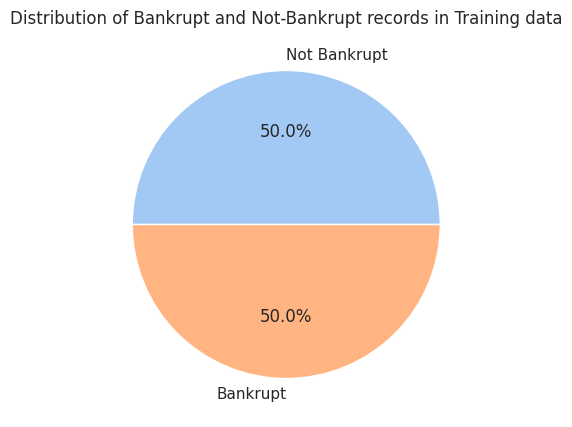

In [34]:
plt.figure(figsize = (7,5))
labels = ["Not Bankrupt", "Bankrupt"]

plt.pie(pd.DataFrame(y_train).value_counts(),labels = labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in Training data")
plt.show()

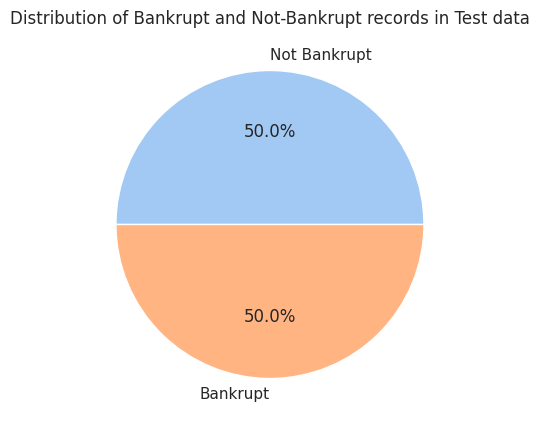

In [35]:
plt.figure(figsize = (7,5))
labels = ["Not Bankrupt", "Bankrupt"]

plt.pie(pd.DataFrame(y_test).value_counts(),labels = labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in Test data")
plt.show()

Note:

The dataset is balanced now at the ratio of 50: 50

In [36]:
X_train=pd.DataFrame(X_train,columns=data_keys[:len(data_keys)-1])
X_train.shape

(64074, 64)

In [37]:
y_train= pd.DataFrame(y_train)

In [38]:
X_test=pd.DataFrame(X_test,columns=data_keys[:len(data_keys)-1])

In [39]:
y_test=pd.DataFrame(y_test)